In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy

In [2]:
df = pd.read_csv('heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
#df.to_csv('new.csv') to save/download your current csv file in your device

In [8]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

<AxesSubplot:xlabel='count', ylabel='death'>

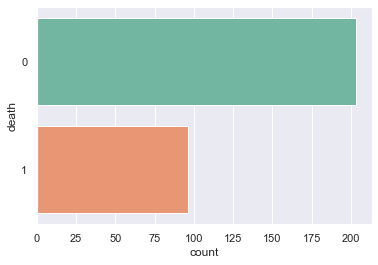

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(y='death',data=df, palette = "Set2")

<AxesSubplot:xlabel='death', ylabel='count'>

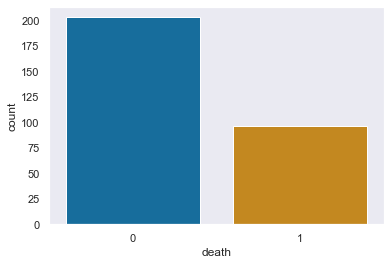

In [10]:
sns.set_theme(style="dark")
sns.countplot(x='death',data=df, palette = "colorblind")

(<AxesSubplot:xlabel='diabetes', ylabel='count'>,)

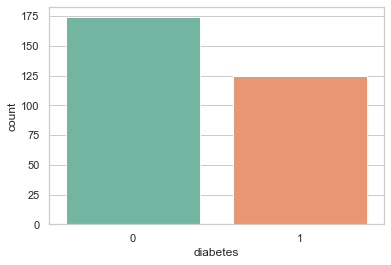

In [11]:
sns.set_theme(style="whitegrid")
sns.countplot(x='diabetes', data=df, palette = "Set2") , #='death')

<AxesSubplot:xlabel='diabetes', ylabel='count'>

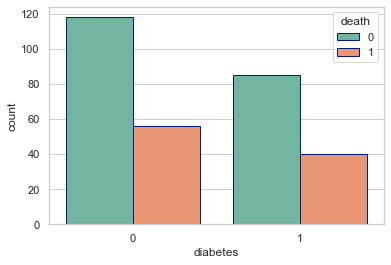

In [12]:
sns.countplot(x='diabetes',hue='death',data=df,palette = "Set2",edgecolor= sns.color_palette("dark", n_colors=1))

In [13]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

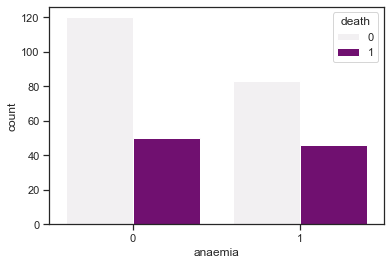

In [14]:
sns.set_theme(style="ticks")
sns.countplot(x='anaemia', data=df, hue='death', color='purple')

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

<AxesSubplot:xlabel='anaemia', ylabel='count'>

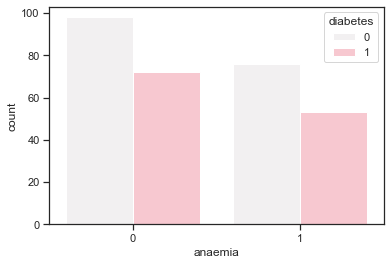

In [16]:
sns.countplot(x='anaemia', data=df, hue='diabetes', color = "pink")

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

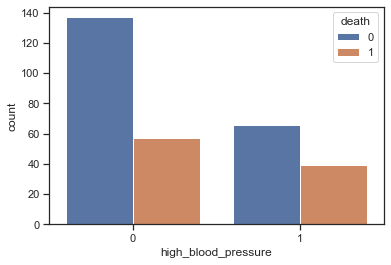

In [17]:
sns.countplot(x='high_blood_pressure', data=df, hue='death')

In [18]:
x = df.drop('death',axis=1)

In [19]:
y = df['death']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [22]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [23]:
ytest.shape

(90,)

In [24]:
xtrain.shape

(209, 12)

# Apply Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt = DecisionTreeClassifier()

In [27]:
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [28]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [29]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [30]:
pred # Predicted value of Y

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [31]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Evaluate the ML model

In [32]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [33]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.74      0.79      0.76        53\n           1       0.67      0.59      0.63        37\n\n    accuracy                           0.71        90\n   macro avg       0.70      0.69      0.70        90\nweighted avg       0.71      0.71      0.71        90\n'

In [34]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76        53
           1       0.67      0.59      0.63        37

    accuracy                           0.71        90
   macro avg       0.70      0.69      0.70        90
weighted avg       0.71      0.71      0.71        90



In [35]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [36]:
test_confusion_matrix

array([[42, 11],
       [15, 22]], dtype=int64)

<AxesSubplot:>

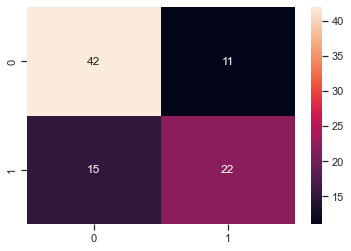

In [37]:
sns.heatmap(test_confusion_matrix, annot=True)

In [38]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [39]:
dt.score(xtest,ytest)

0.7111111111111111

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier() # default n_estimators=100 ; 100 trees

In [42]:
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [43]:
clf.score(xtest, ytest)

0.7777777777777778

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
n_estimators = [int(x) for x in numpy.linspace(start=15, stop=200, num=20)]
n_estimators

[15,
 24,
 34,
 44,
 53,
 63,
 73,
 83,
 92,
 102,
 112,
 122,
 131,
 141,
 151,
 161,
 170,
 180,
 190,
 200]

In [46]:
min_samples_split = numpy.random.randint(1,12,15)
len(min_samples_split)

15

In [47]:
n_estimators = numpy.random.randint(15,150,30)
n_estimators

array([107,  75,  99, 146,  61, 134, 106, 117, 118,  50,  43, 147,  50,
        55, 117, 103,  84,  39,  35, 101, 101,  18, 103,  44,  16, 147,
       112,  81,  47,  98])

In [48]:
#Assign Parameters
n_estimators = numpy.random.randint(15,200,40)
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = numpy.random.randint(1,10,20)
min_samples_split = numpy.random.randint(1,10,15) #[1,2,3,4]
min_samples_leaf= numpy.random.randint(1,4,15)  #[ 1,2,3,4]

parameters = {
    'n_estimators'  : n_estimators,
    'criterion' : criterion,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [49]:
print(parameters)

{'n_estimators': array([124,  49, 152,  41, 100, 189, 155, 124, 151,  57, 113, 157,  20,
       115,  99, 176, 101,  59,  98, 165,  22,  56, 106,  65,  89,  42,
        48,  99,  30, 189,  46,  89,  54, 176,  22, 134, 184,  86,  91,
        18]), 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': array([2, 5, 1, 3, 1, 6, 7, 3, 5, 6, 9, 9, 3, 6, 3, 8, 5, 8, 8, 2]), 'min_samples_split': array([2, 3, 4, 7, 2, 7, 1, 7, 4, 3, 1, 4, 8, 4, 8]), 'min_samples_leaf': array([2, 2, 3, 2, 1, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1])}


In [50]:
random_forest = RandomForestClassifier()

In [51]:
r = RandomizedSearchCV(random_forest , parameters, n_iter = 300, cv = 3) #cv = cross validation , clf=RandomForestClassifier()

In [52]:
import warnings
warnings.filterwarnings('ignore')
r.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 5, 1, 3, 1, 6, 7, 3, 5, 6, 9, 9, 3, 6, 3, 8, 5, 8, 8, 2]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([2, 2, 3, 2, 1, 3, 2, 1, 2, 1, 3, 1, 1, 1, 1]),
                                        'min_samples_split': array([2, 3, 4, 7, 2, 7, 1, 7, 4, 3, 1, 4, 8, 4, 8]),
                                        'n_estimators': array([124,  49, 152,  41, 100, 189, 155, 124, 151,  57, 113, 157,  20,
       115,  99, 176, 101,  59,  98, 165,  22,  56, 106,  65,  89,  42,
        48,  99,  30, 189,  46,  89,  54, 176,  22, 134, 184,  86,  91,
        18])})

In [53]:
r.cv_results_

{'mean_fit_time': array([0.36437925, 0.16361443, 0.34995882, 0.29898914, 0.14797648,
        0.18044496, 0.03851215, 0.30469298, 0.10638825, 0.17353241,
        0.35984826, 0.08598797, 0.25110205, 0.09692335, 0.10950994,
        0.19682622, 0.19376167, 0.1952858 , 0.22598314, 0.18478171,
        0.20562792, 0.02774024, 0.25467141, 0.05636581, 0.09323676,
        0.11155216, 0.29104384, 0.11058831, 0.10243479, 0.18480635,
        0.02849929, 0.20493174, 0.11565002, 0.10027345, 0.08885686,
        0.30386877, 0.11574483, 0.35211039, 0.30200855, 0.11170308,
        0.14474408, 0.28141189, 0.30600882, 0.08504677, 0.23860518,
        0.1013155 , 0.08350333, 0.2194589 , 0.09418352, 0.05445989,
        0.17089399, 0.153608  , 0.09506098, 0.16646751, 0.18503475,
        0.21146687, 0.18095915, 0.35924904, 0.34298452, 0.09506234,
        0.30283896, 0.28899161, 0.20453914, 0.23037529, 0.16906985,
        0.23948216, 0.19439816, 0.34569057, 0.03363061, 0.19312406,
        0.35707291, 0.0945127 ,

In [54]:
result = pd.DataFrame(r.cv_results_)

In [55]:
result.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.364379,0.043780,0.039417,0.006119,176,4,3,log2,2,entropy,"{'n_estimators': 176, 'min_samples_split': 4, ...",0.785714,0.914286,0.826087,0.842029,0.053686,220
1,0.163614,0.018880,0.015627,0.000003,86,4,2,auto,1,entropy,"{'n_estimators': 86, 'min_samples_split': 4, '...",0.728571,0.771429,0.753623,0.751208,0.017580,261
2,0.349959,0.034024,0.027961,0.005489,176,4,1,log2,2,gini,"{'n_estimators': 176, 'min_samples_split': 4, ...",0.800000,0.885714,0.797101,0.827605,0.041106,228
3,0.298989,0.024592,0.018635,0.009322,152,4,1,log2,1,gini,"{'n_estimators': 152, 'min_samples_split': 4, ...",0.742857,0.757143,0.782609,0.760870,0.016441,243
4,0.147976,0.019658,0.012691,0.002011,65,7,2,auto,8,entropy,"{'n_estimators': 65, 'min_samples_split': 7, '...",0.828571,0.957143,0.840580,0.875431,0.057986,85


In [56]:
r.best_score_

0.9042097998619738

In [57]:
new_r = r.best_estimator_

In [58]:
new_r

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=42)

In [59]:
new_r.fit(xtrain, ytrain) # RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_split=5,n_estimators=102)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=42)

In [60]:
new_r.score(xtest, ytest)

0.7777777777777778

# Grid Search CV

In [61]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = { 
    'n_estimators': [15, 200, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7],
    'criterion' :['gini', 'entropy'],
}

In [64]:
print(param_grid)

{'n_estimators': [15, 200, 40], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}


In [65]:
rf_1 = RandomForestClassifier()

In [66]:
rf_1

RandomForestClassifier()

In [67]:
rf_2 = GridSearchCV(rf_1, param_grid, cv = 3)

In [68]:
rf_2

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 40]})

In [69]:
import warnings
warnings.filterwarnings('ignore')
rf_2.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [15, 200, 40]})

In [71]:
print(rf_2.cv_results_)

{'mean_fit_time': array([0.03251894, 0.37435627, 0.07093962, 0.03225048, 0.36541653,
       0.06853565, 0.02301009, 0.3727932 , 0.07205669, 0.02821485,
       0.36437766, 0.07417583, 0.03864733, 0.37040194, 0.0680213 ,
       0.03296884, 0.37261558, 0.07528853, 0.03295668, 0.38425756,
       0.09129071, 0.03464365, 0.44209774, 0.06904213, 0.03332925,
       0.40676443, 0.08228238, 0.03365413, 0.48816379, 0.0928913 ,
       0.05129004, 0.42098252, 0.08656931, 0.03397584, 0.39996028,
       0.07354132, 0.03793232, 0.37148714, 0.08437149, 0.03336612,
       0.44054   , 0.08879034, 0.04035441, 0.41700133, 0.0720621 ,
       0.03862858, 0.39282306, 0.07707866, 0.0329167 , 0.4053398 ,
       0.07464107, 0.03021844, 0.41006486, 0.0849723 , 0.02549124,
       0.40147074, 0.08845035, 0.02978826, 0.42149766, 0.07816601,
       0.03078945, 0.39545639, 0.09916385, 0.03021725, 0.36821111,
       0.07592042, 0.03292163, 0.37071602, 0.08465131, 0.03341691,
       0.37581046, 0.07957339, 0.02748704, 0

In [75]:
result = pd.DataFrame(rf_2.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032519,0.003188,0.000000,0.000000,gini,2,auto,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.800000,0.914286,0.797101,0.837129,0.054571,97
1,0.374356,0.020957,0.035101,0.002775,gini,2,auto,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.871429,0.811594,0.837198,0.025177,96
2,0.070940,0.005189,0.012601,0.004305,gini,2,auto,40,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.785714,0.942857,0.782609,0.837060,0.074821,99
3,0.032250,0.001418,0.000000,0.000000,gini,2,sqrt,15,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.757143,0.814286,0.884058,0.818496,0.051898,107
4,0.365417,0.012870,0.030714,0.000743,gini,2,sqrt,200,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.814286,0.928571,0.826087,0.856315,0.051320,76


In [74]:
rf_2.best_score_

0.8898550724637682

In [76]:
new_rf_2 = rf_2.best_estimator_ 
new_rf_2

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=40)

In [77]:
new_rf_2.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=40)

In [78]:
new_rf_2.score(xtest, ytest)

0.7666666666666667

# Accuracy Comparision

In [80]:
Decision_Tree = "Decision Tree"
Random_Forest = "Random Forest"
RandomizedSearchCV = "Random Forest using RandomizedSearchCV"
Random_Forest_using_GridSearchCV = " Random Forest using GridSearchCV"
df=pd.DataFrame([[Decision_Tree,0.7111111111111111],[Random_Forest, 0.7777777777777778],  [RandomizedSearchCV, 0.7777777777777778], [Random_Forest_using_GridSearchCV, 0.7666666666666667]],
                 columns=['Accuracy', 'Value'])

In [81]:
df

,Accuracy,Value
0,Decision Tree,0.711111
1,Random Forest,0.777778
2,Random Forest using RandomizedSearchCV,0.777778
3,Random Forest using GridSearchCV,0.766667


<AxesSubplot:xlabel='Value', ylabel='Accuracy'>

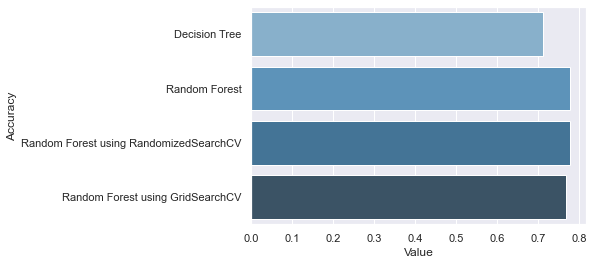

In [83]:
sns.set()
sns.barplot(x="Value", y="Accuracy", data=df,
                 palette="Blues_d")